In [101]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display
%matplotlib inline

### 1. Understand dataframe

In [98]:
url='http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'
data=pd.read_csv(url, index_col=0)
display(data[0:20])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [47]:
SL=data['Sepal.Length']
SW=data['Sepal.Width']
PL=data['Petal.Length']
PW=data['Petal.Width']
feature=[SL,SW,PL,PW]
Spe=data['Species']
new_data=data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
display(new_data[0:20])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2
10,4.9,3.1,1.5,0.1


{'boxes': [<matplotlib.lines.Line2D at 0x2b56213e438>,
 'caps': [<matplotlib.lines.Line2D at 0x2b562149eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b562157828>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b56214f940>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2b56213edd8>,
  <matplotlib.lines.Line2D at 0x2b5620df5c0>]}

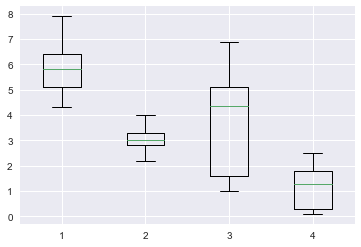

In [37]:
plt.boxplot((SL,SW,PL,PW))

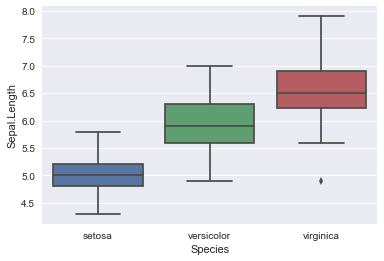

In [56]:
sb.boxplot(x='Species', y='Sepal.Length', data=data)

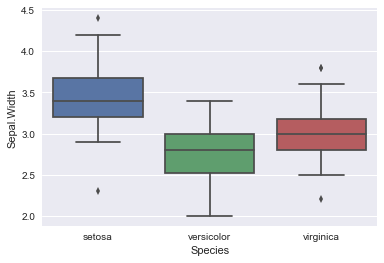

In [54]:
sb.boxplot(x='Species', y='Sepal.Width', data=data)

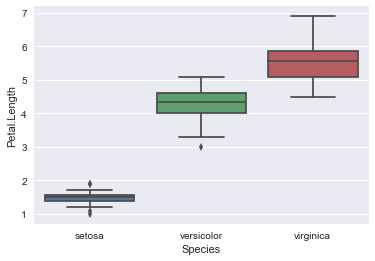

In [52]:
sb.boxplot(x='Species', y='Petal.Length', data=data)

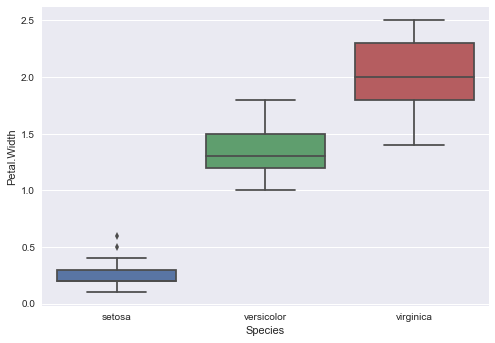

In [78]:
sb.boxplot(x='Species', y='Petal.Width', data=data)

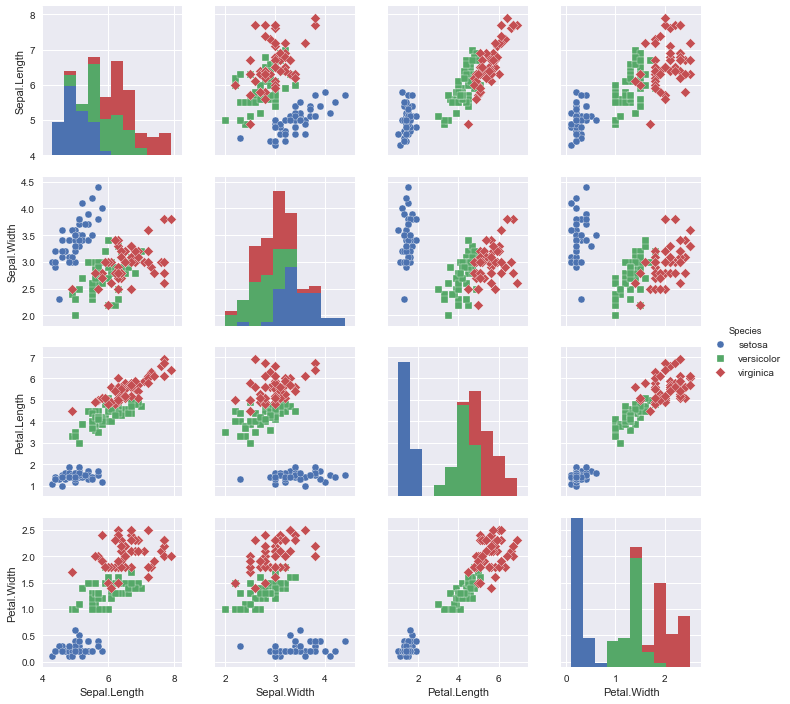

In [79]:
sb.pairplot(data, hue="Species", markers=["o", "s", "D"])

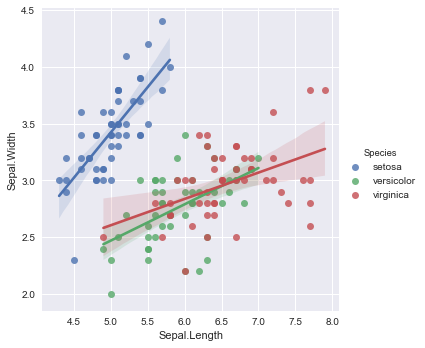

In [64]:
sb.set()
g=sb.lmplot(x="Sepal.Length", y="Sepal.Width", hue="Species", truncate=True, size=5, data=data)

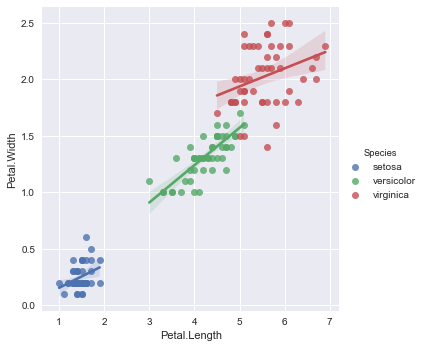

In [66]:
sb.set()
g=sb.lmplot(x="Petal.Length", y="Petal.Width", hue="Species", truncate=True, size=5, data=data)

In [76]:
setosa = data.query("Species == 'setosa'")
virginica = data.query("Species == 'virginica'")

f,ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")

ax=sb.kdeplot(setosa.Sepal.Width, setosa.Sepal.Length, cmap="Reds", shade=True. shade_lowest=False)
ax=sb.kdeplot(virginica.Sepal.Width, virginica.Sepal.Length, cmap="Blues", shade=True. shade_lowest=False)

red = sb.color_palette("Reds")[-2]
blue = sb.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

SyntaxError: invalid syntax (<ipython-input-76-76c49b6f1da0>, line 7)

C:\Users\wooli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


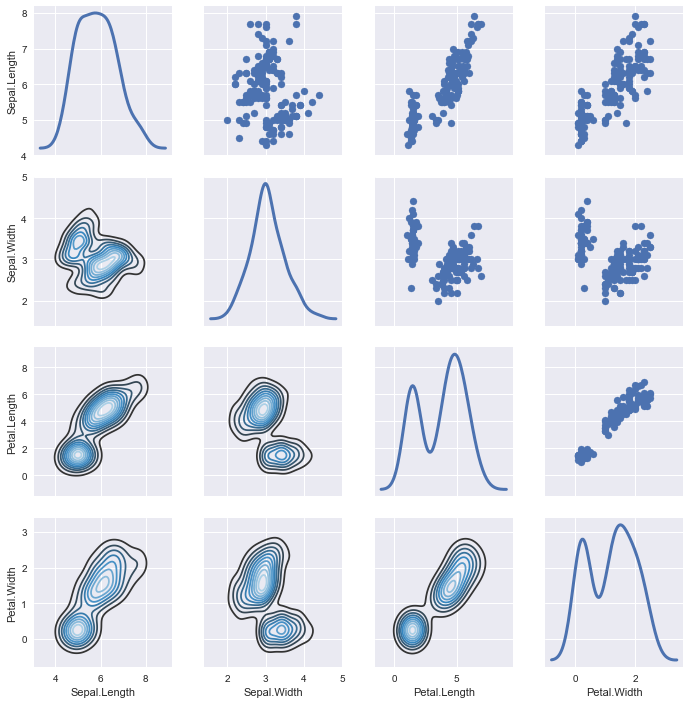

In [77]:
g = sb.PairGrid(data, diag_sharey=False)
g.map_lower(sb.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sb.kdeplot, lw=3)

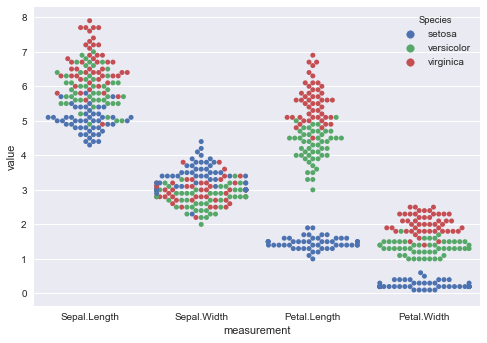

In [81]:
new_data1= pd.melt(data, "Species", var_name="measurement")
sb.swarmplot(x="measurement", y="value", hue="Species", data=new_data1)

### 2. Statistical Analysis


In [97]:
groupby_species=data.groupby('Species')


In [88]:
groupby_species.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [89]:
groupby_species.var()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [96]:
model=ols("SL ~ Spe",data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SL   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           1.67e-31
Time:                        14:45:46   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.0060      0.07

In [107]:
x_std=StandardScaler().fit_transform(new_data)
pca=PCA(n_components=2)
Y=pca.fit_transform(x_std)
pca_df=pd.DataFrame(Y)
pca_df.index=new_data.index
pca_df.columns=['PC1','PC2']
df2=pd.concat([new_data,pca_df],axis=1)
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,PC1,PC2
1,5.1,3.5,1.4,0.2,-2.264703,0.480027
2,4.9,3.0,1.4,0.2,-2.080961,-0.674134
3,4.7,3.2,1.3,0.2,-2.364229,-0.341908
4,4.6,3.1,1.5,0.2,-2.299384,-0.597395
5,5.0,3.6,1.4,0.2,-2.389842,0.646835
6,5.4,3.9,1.7,0.4,-2.075631,1.489178
7,4.6,3.4,1.4,0.3,-2.444029,0.047644
8,5.0,3.4,1.5,0.2,-2.232847,0.223148
9,4.4,2.9,1.4,0.2,-2.334640,-1.115328
10,4.9,3.1,1.5,0.1,-2.184328,-0.469014
